In [5]:
import time
import ray
import matplotlib.pyplot as plt

In [ ]:
def faz_alguma_coisa():
    #print("fazendo alguma coisa")
    time.sleep(0.2)
    return 42

start_time     = time.time()
tempos_sem_ray = []
for _ in range(50):
    faz_alguma_coisa()
    tempos_sem_ray.append(time.time() - start_time)    
total_time = time.time() - start_time
print(f"Tempo total sem Ray: {total_time:.2f} segundos")

Tempo total sem Ray: 10.01 segundos


In [3]:
@ray.remote
def faz_alguma_coisa_ray():
    time.sleep(0.2)
    return 42

start_time_ray = time.time()
tempos_com_ray = []
futures        = []
# futures = [faz_alguma_coisa_ray.remote() for _ in range(50)]
for _ in range(50):
    futures.append(faz_alguma_coisa_ray.remote())
    tempos_com_ray.append(time.time() - start_time_ray)
results = ray.get(futures)
total_time_ray = time.time() - start_time_ray
print(f"Tempo total com Ray: {total_time_ray:.2f} segundos")
print(f"O speedup com ray foi de: {total_time / total_time_ray:.2f}x")

2025-08-21 11:20:28,362	INFO worker.py:1927 -- Started a local Ray instance.


Tempo total com Ray: 3.67 segundos
O speedup com ray foi de: 2.72x


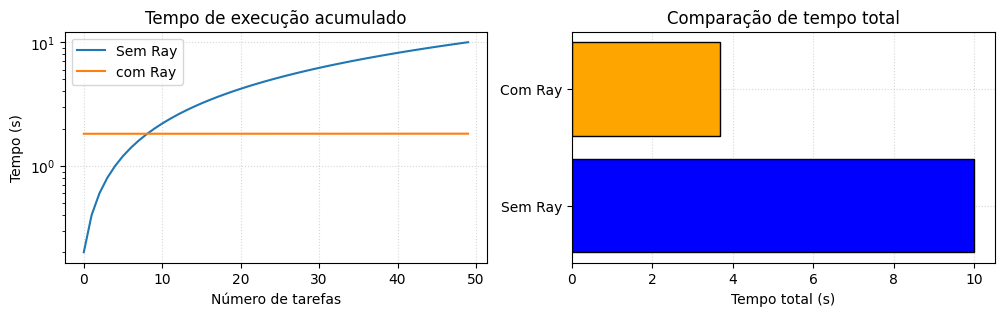

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
ax[0].plot(tempos_sem_ray, label="Sem Ray")
ax[0].plot(tempos_com_ray, label="com Ray")
ax[0].set_yscale("log")
ax[0].set_xlabel("Número de tarefas")
ax[0].set_ylabel("Tempo (s)")
ax[0].legend()
ax[0].set_title("Tempo de execução acumulado")
ax[0].grid(True, linestyle=':', alpha=0.5)

ax[1].barh(["Sem Ray", "Com Ray"], [total_time, total_time_ray], color=['blue', 'orange'], ec='k')
ax[1].set_xlabel("Tempo total (s)")
ax[1].set_title("Comparação de tempo total")
ax[1].grid(True, linestyle=':', alpha=0.5)
ax[1].set_axisbelow(True)

In [7]:
# Define uma função como task
@ray.remote
def quadrado(x):
    return x * x

# Executa várias tasks em paralelo
futuros = [quadrado.remote(i) for i in range(5)]

# Pega os resultados
resultados = ray.get(futuros)

print("Resultados das tasks:", resultados)

Resultados das tasks: [0, 1, 4, 9, 16]


In [8]:
# Define um actor
@ray.remote
class Contador:
    def __init__(self):
        self.valor = 0

    def incrementar(self):
        self.valor += 1
        return self.valor

    def get_valor(self):
        return self.valor

# Cria um actor (um "objeto remoto")
contador = Contador.remote()

# Faz algumas chamadas no actor
print(ray.get(contador.incrementar.remote()))  # 1
print(ray.get(contador.incrementar.remote()))  # 2
print(ray.get(contador.get_valor.remote()))    # 2

1
2
2
